In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

df_Used_Cars=pd.read_csv('UsedCarsSA_Unclean_EN.csv')


In [198]:
df_Used_Cars

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,Used,260,Najran,Negotiable,True
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


In [199]:
df_Used_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


# clean data 

In [273]:
# Create Brand_Model column 
df_Used_Cars['Brand_Model'] = df_Used_Cars['Make'] + ' ' + df_Used_Cars['Type']

In [200]:
df=pd.read_csv('UsedCarsSA_Clean_EN.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [201]:
df_Used_Cars=df_Used_Cars.drop(columns=['Link','Condition'])

In [202]:
df_Used_Cars['Price'].unique()

array(['114000', 'Negotiable', '27500', '43000', '59500', '72000',
       '92000', '80000', '32000', '50000', '135000', '153000', '235000',
       '210000', '37000', '45000', '83000', '24500', '174000', '38000',
       '145000', '178000', '230000', '130000', '68000', '36000', '26800',
       '111000', '99000', '48000', '75000', '12000', '55000', '70000',
       '120000', '108000', '58000', '42000', '62000', '110000', '93000',
       '165000', '126000', '47000', '59000', '60000', '87000', '207000',
       '85000', '140000', '15000', '10000', '345000', '77000', '54000',
       '27000', '280000', '410000', '18500', '95000', '105000', '107000',
       '418000', '40800', '21500', '22500', '44000', '69000', '40000',
       '79000', '73000', '41000', '98000', '57000', '24000', '64000',
       '115000', '29000', '106000', '125000', '89000', '78000', '52000',
       '88000', '122000', '270000', '26000', '25500', '65000', '33000',
       '49000', '109000', '63000', '29500', '43500', '25900', '30

In [203]:
df_Used_Cars['Price']=pd.to_numeric(
    df_Used_Cars['Price'],
    errors='coerce')

In [204]:
df_Used_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8248 non-null   object 
 1   Type         8248 non-null   object 
 2   Year         8248 non-null   int64  
 3   Origin       8153 non-null   object 
 4   Color        8248 non-null   object 
 5   Options      8139 non-null   object 
 6   Engine_Size  5982 non-null   float64
 7   Fuel_Type    8248 non-null   object 
 8   Gear_Type    8174 non-null   object 
 9   Mileage      8248 non-null   int64  
 10  Region       8248 non-null   object 
 11  Price        5652 non-null   float64
 12  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 781.4+ KB


In [205]:
df_Used_Cars=df_Used_Cars[(df_Used_Cars['Mileage']>=100) &
                    (df_Used_Cars['Mileage']<= 500000 )]

In [206]:
df_Used_Cars['Year'].unique()

array([2018, 2016, 2019, 2011, 2009, 2017, 2014, 2020, 2021, 2008, 2015,
       2013, 1993, 2012, 2010, 2006, 2007, 1992, 2001, 1982, 1996, 1997,
       1999, 2022, 2005, 1984, 1995, 2002, 2000, 1998, 1991, 2004, 1986,
       1988, 2003, 1983, 1989, 1990, 1979, 1978, 1985, 1936, 1977, 1980,
       1987, 1994, 1964, 1963, 1981, 1965, 1972, 1970, 1975, 1968, 1961])

In [207]:
df_Used_Cars = df_Used_Cars[df_Used_Cars['Year'] >= 2010]

In [208]:
df_Used_Cars

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,NaN,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,77000,Riyadh,75000.0,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,150000,Riyadh,53000.0,False
8245,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,260,Najran,NaN,True
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000.0,False


In [209]:
df_Used_Cars.drop_duplicates(inplace=True)

### What are the top 10 most popular used car brands in Saudi Arabia?

C:\Users\HP\AppData\Local\Temp\ipykernel_18592\341925420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_used_cars, y='Make', x='Percentage', palette='dark:b')


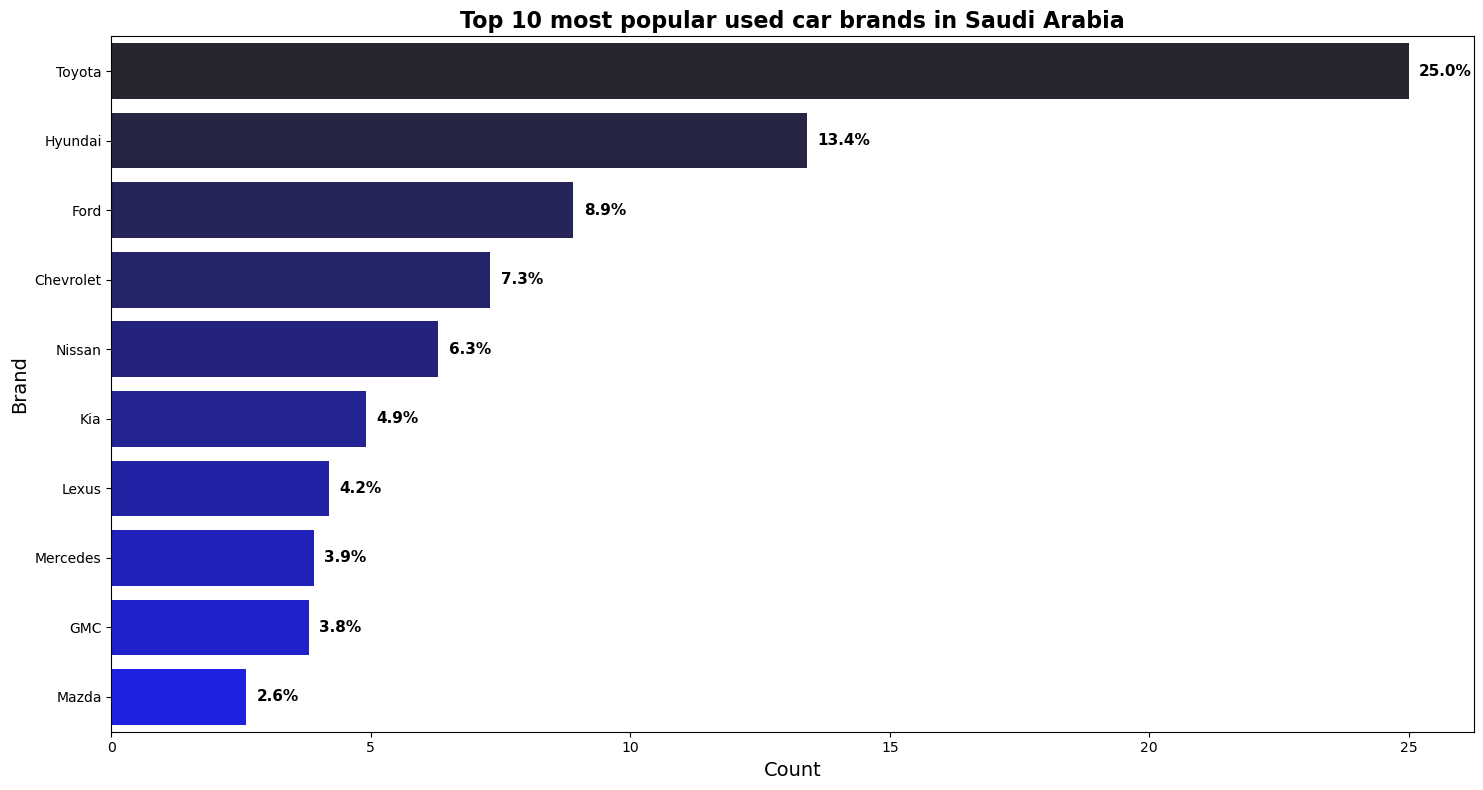

In [ ]:
# total number of used cars in the dataset
total = df_Used_Cars['Make'].count()  

# Get top 10 with counts and percentages
top_used_cars = df_Used_Cars['Make'].value_counts().head(10).reset_index()
top_used_cars['Percentage']=(top_used_cars['count'] / total * 100).round(1)
top_used_cars['Label'] = top_used_cars['Make'] + ' (' + top_used_cars['Percentage'].astype(str) + '%)'


# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=top_used_cars, y='Make', x='Percentage', palette='dark:b')
plt.title('Top 10 most popular used car brands in Saudi Arabia', fontsize=16,fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)


for i,v in enumerate(top_used_cars['Percentage']):
    plt.text(v+0.2,i,f'{v}%',
    va='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

### What are the most in-demand car colors

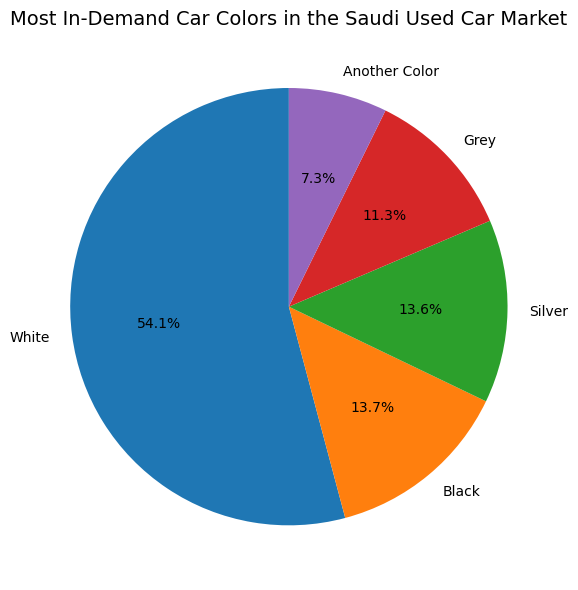

In [348]:
high_demand_color=df_Used_Cars['Color'].value_counts().head(5)

# plot
plt.figure(figsize=(12, 6))
high_demand_color.plot(kind='pie',startangle=90, autopct='%1.1f%%')
plt.title("Most In-Demand Car Colors in the Saudi Used Car Market", fontsize=14)
plt.ylabel("") 
plt.tight_layout()
plt.show()


### What proportion of used cars have negotiable prices?

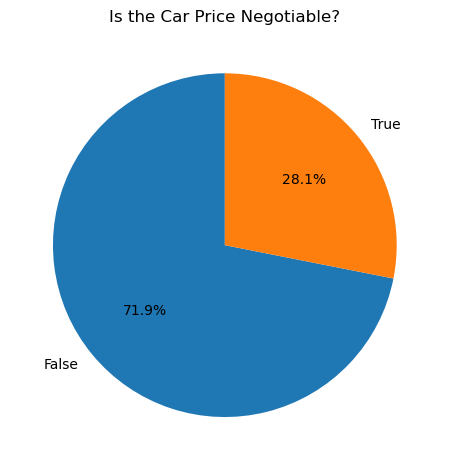

In [347]:
df_Used_Cars['Negotiable'].value_counts().plot(kind='pie',startangle=90, autopct='%1.1f%%')
plt.title('Is the Car Price Negotiable?')
plt.ylabel('')
plt.tight_layout()
plt.show()

### What are the most expensive brands?

In [ ]:
avg_price_brand_type = df_Used_Cars.groupby('Make')['Price'].mean().reset_index()
avg_price_brand_type = avg_price_brand_type.sort_values('Price', ascending=False)


,Make,Price
48,Rolls-Royce,543333.333333
5,Bentley,479722.222222
1,Aston Martin,376666.666667
32,Land Rover,262929.687500
56,Volvo,227500.000000
38,Maserati,216916.666667
40,Mercedes,198709.459459
33,Lexus,185085.446009
46,Porsche,173950.000000
3,BMW,161459.210526


C:\Users\HP\AppData\Local\Temp\ipykernel_18592\2082778740.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_brand, x='Price', y='Make', palette='dark:b',legend=True)


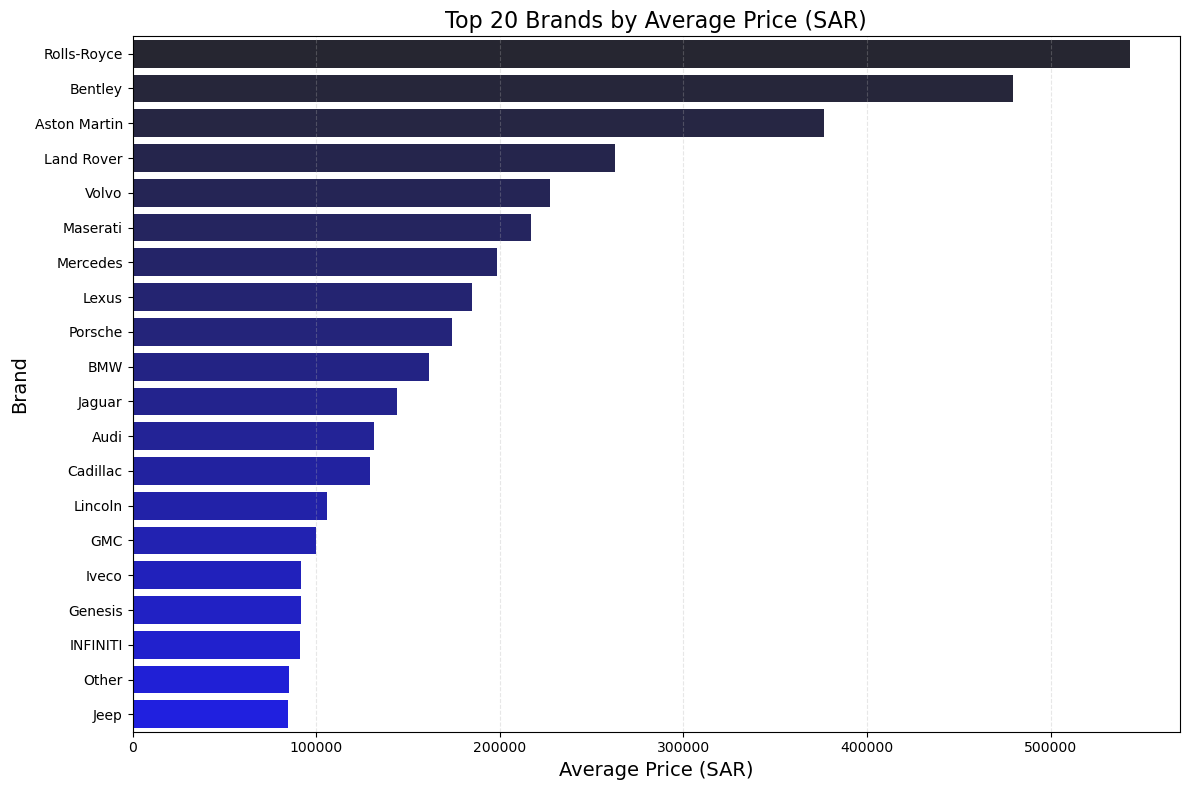

In [ ]:
# Step 1: Compute average price per Brand
avg_price_brand = (df_Used_Cars.groupby('Make')['Price']
            .mean()
            .sort_values(ascending=False)
            .head(20)  # Top 20 brands
            .reset_index())


# plot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_brand, x='Price', y='Make', palette='dark:b',legend=True)
plt.title('Top 20 Brands by Average Price (SAR)', fontsize=16)
plt.xlabel('Average Price (SAR)',fontsize=14)
plt.ylabel('Brand',fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### What is the variation in price across different car brands and their respective models

C:\Users\HP\AppData\Local\Temp\ipykernel_18592\3180770745.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


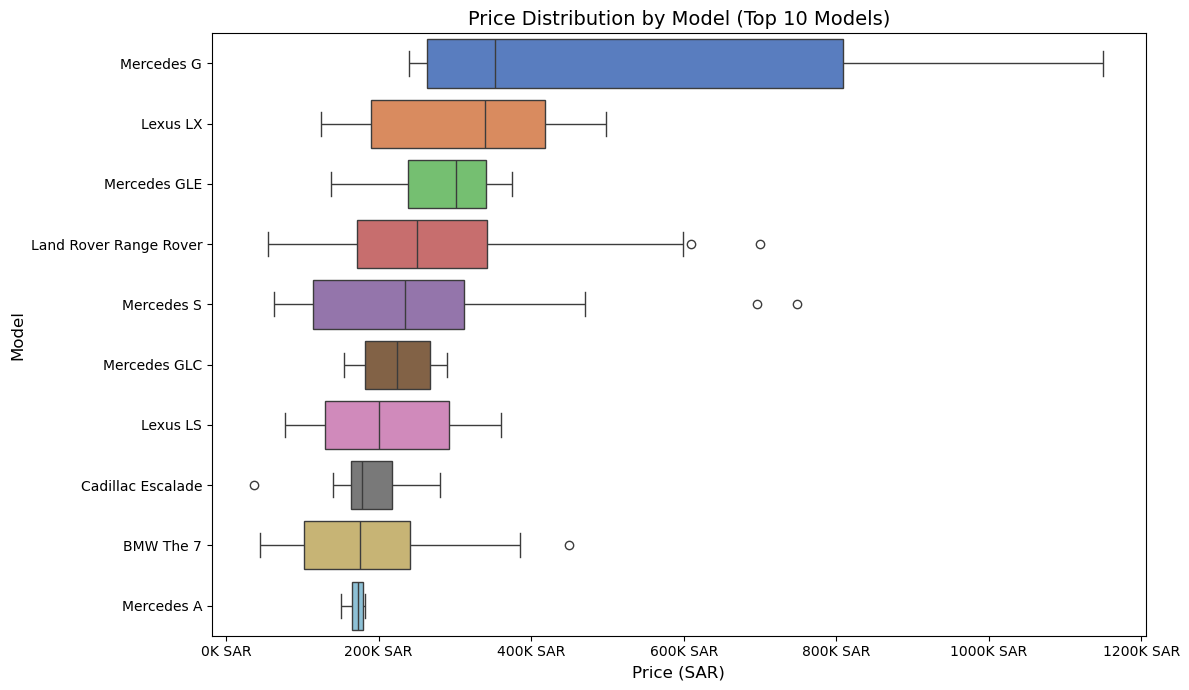

In [274]:
# Count number of listings for each car Type
valid_models = (
    df_Used_Cars.groupby('Type')
    .size()
    # .loc[lambda x: x >= 5]
    # .index
)


# Keep only car Types with at least 5 listings
valid_models = valid_models[valid_models >= 5].index

# Select top 10 car Types by highest median price
top_models = (
    df_Used_Cars[df_Used_Cars['Type'].isin(valid_models)]
    .groupby('Type')['Price']
    .median()
    .sort_values(ascending=False)
    .head(10)
    .index  
)

# Filter dataset to include only top 10 expensive car Types
data = df_Used_Cars[df_Used_Cars['Type'].isin(top_models)]

# data['Brand_Model'] = data['Make'] + ' ' + data['Type']

# Order models by median price (Brand_Model level)
order = (
    data.groupby('Brand_Model')['Price']
    .median()
    .sort_values(ascending=False)
    .index
)
# plot
plt.figure(figsize=(12, 7))

sns.boxplot(
    data=data,
    y='Brand_Model',
    x='Price',
    order=order,
    palette='muted'
    # showfliers=False  # hides extreme outliers
)

plt.title('Price Distribution by Model (Top 10 Models)', fontsize=14)
plt.xlabel('Price (SAR)',fontsize=12)
plt.ylabel('Model',fontsize=12)

plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{int(x/1_000)}K SAR'))


plt.tight_layout()
plt.show()


### What is the trend of used car prices over the years

In [349]:
yearly_price = df_Used_Cars.groupby('Year')['Price'].mean().reset_index()

<Figure size 1200x800 with 0 Axes>

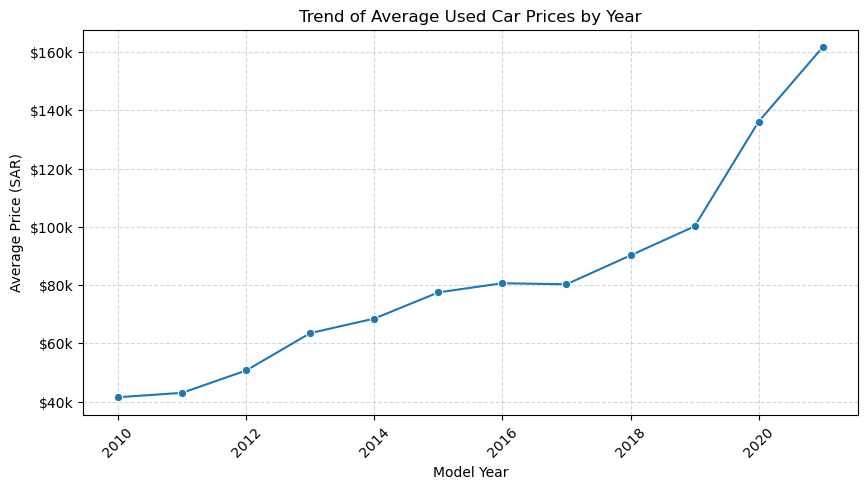

In [104]:
plt.figure(figsize=(12,8))

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=yearly_price,
    x='Year',
    y='Price',
    marker='o'
)

plt.title('Trend of Average Used Car Prices by Year',fontsize=12)
plt.xlabel('Model Year',fontsize=10)
plt.ylabel('Average Price (SAR)',fontsize=10)
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y ,pos:f'${int(y/1000)}k'))

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Which vehicles tend to have higher mileage by year?

C:\Users\HP\AppData\Local\Temp\ipykernel_18592\1771870242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_mileage_by_year,x='Year',y='Mileage',palette='dark:b')


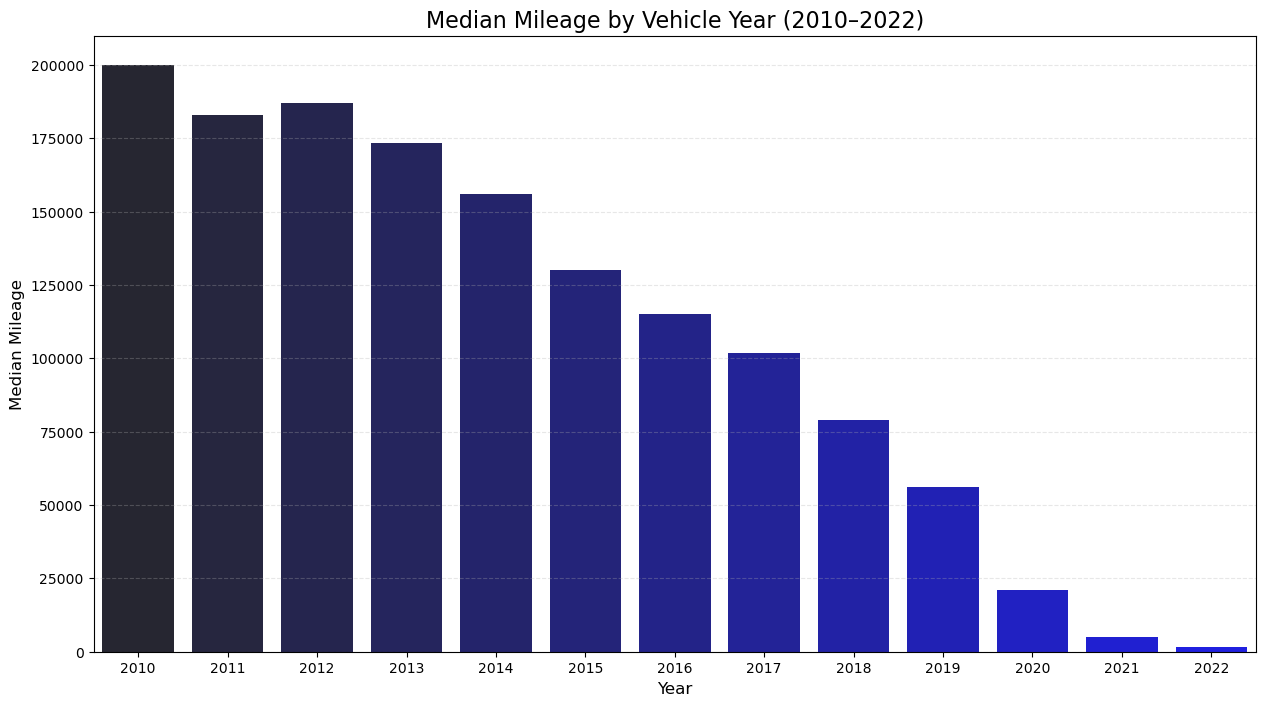

In [331]:
# Group by year and calculate median mileage
median_mileage_by_year = df_Used_Cars.groupby('Year')['Mileage'].median().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=median_mileage_by_year,x='Year',y='Mileage',palette='dark:b')
plt.title("Median Mileage by Vehicle Year (2010–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Mileage", fontsize=12)
plt.xticks(median_mileage_by_year.index)  # show all years on x-axis

# Add grid for easier reading
plt.grid(axis='y', alpha=0.3, linestyle='--')


plt.show()

In [333]:
df_Used_Cars['Color'].unique()

array(['Black', 'White', 'Silver', 'Grey', 'Navy', 'Bronze', 'Red',
       'Another Color', 'Golden', 'Brown', 'Blue', 'Oily', 'Green',
       'Orange', 'Yellow'], dtype=object)

# conclusion

In [325]:
"""
High mileage = negative for price, positive in terms of the car's user experience
Low mileage = good for price, the car is "more attractive" in the used car market
"""

'\nHigh mileage = negative for price, positive in terms of the car\'s user experience\nLow mileage = good for price, the car is "more attractive" in the used car market\n'

### What is the average vehicle price for the most in-demand car models by gearbox type?

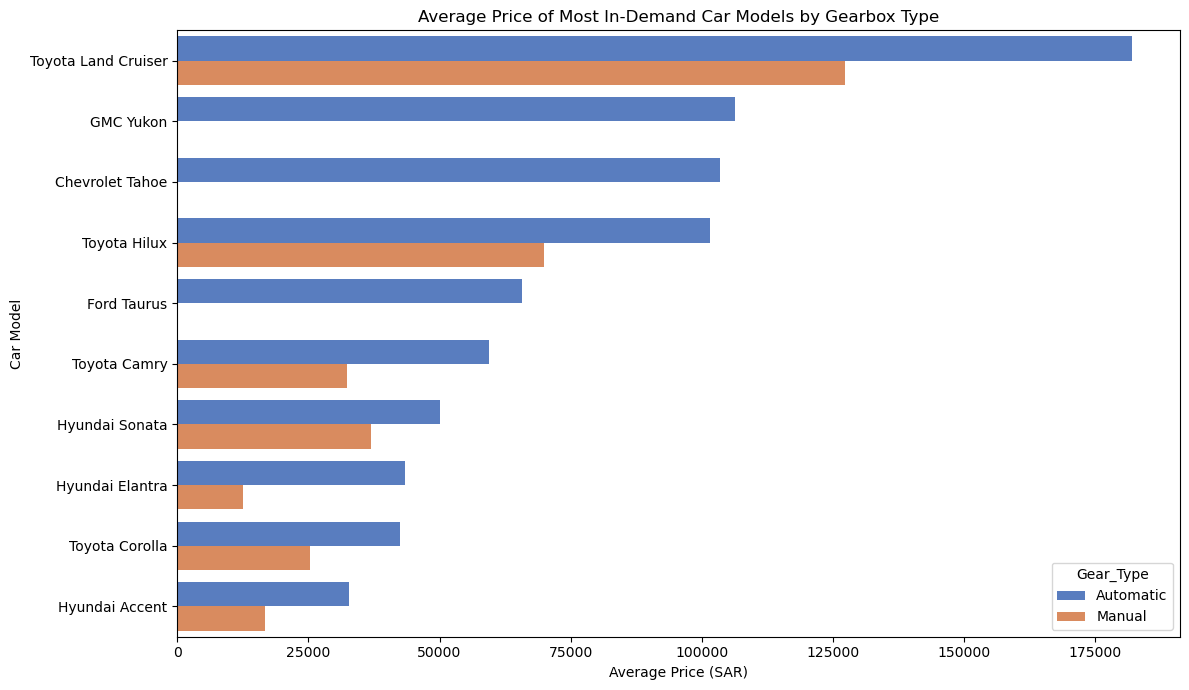

In [ ]:
# Create Brand_Model column
top_brand_model=df_Used_Cars['Brand_Model'].value_counts().head(10).index

# Filter dataset
data_top_model=df_Used_Cars[df_Used_Cars['Brand_Model'].isin(top_brand_model)]

# Group by Brand_Model and Gear_Type
avg_price=(data_top_model.groupby(['Brand_Model', 'Gear_Type'])['Price']
            .mean()
            .reset_index()
            .sort_values('Price',ascending=False)
)

# plot
plt.figure(figsize=(12,7))
sns.barplot(data=avg_price,
            y='Brand_Model',
            x='Price',
            hue='Gear_Type',
            palette='muted')

plt.xlabel('Average Price (SAR)')
plt.ylabel('Car Model')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}k'))

plt.title('Average Price of Most In-Demand Car Models by Gearbox Type')
plt.tight_layout()
plt.show()

In [308]:
# Create Brand_Model column
top_brand_model=df_Used_Cars['Brand_Model'].value_counts().head(10).index

# Filter dataset
data_top_model=df_Used_Cars[df_Used_Cars['Brand_Model'].isin(top_brand_model)]

# Group by Brand_Model and Gear_Type
avg_price_1=(data_top_model.groupby(['Brand_Model', 'Gear_Type'])['Price']
            .mean()
            .reset_index()
            .sort_values('Price',ascending=False)
)
# avg_price_1['Adjusted_Price'] = avg_price['Price'] / 2.3
avg_price_1

,Brand_Model,Gear_Type,Price
15,Toyota Land Cruiser,Automatic,182003.862069
16,Toyota Land Cruiser,Manual,127285.714286
2,GMC Yukon,Automatic,106214.572816
0,Chevrolet Tahoe,Automatic,103502.685484
13,Toyota Hilux,Automatic,101550.000000
14,Toyota Hilux,Manual,69885.784000
1,Ford Taurus,Automatic,65748.375839
9,Toyota Camry,Automatic,59475.790123
7,Hyundai Sonata,Automatic,50150.942308
5,Hyundai Elantra,Automatic,43423.159420


### What is the average vehicle price based on the type of fuel and the type of gearbox?

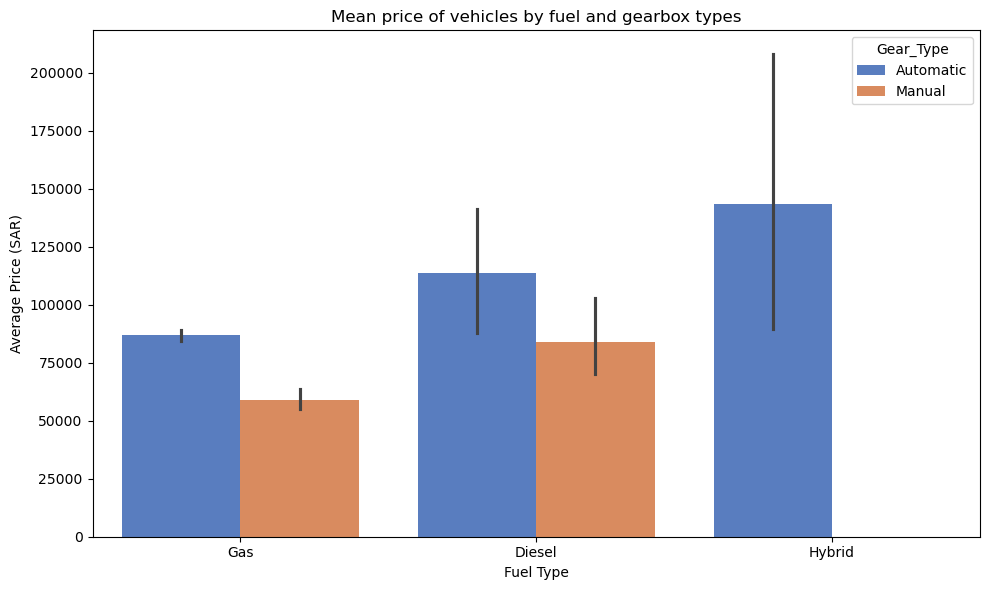

In [301]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Fuel_Type',
    y='Price',
    hue='Gear_Type',
    palette='muted',
    data=df_Used_Cars
)
plt.title("Mean price of vehicles by fuel and gearbox types")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price (SAR)")
plt.tight_layout()
plt.show()


In [309]:
df_Used_Cars.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price', 'Negotiable',
       'Brand_Model'],
      dtype='object')

In [178]:
# avg_price_brand_type = df_Used_Cars.groupby('Make')['Price'].mean().reset_index()
# avg_price_brand_type = avg_price_brand_type.sort_values('Price', ascending=False)
# avg_price_brand_type

In [179]:
# Step 1: Compute average price per Brand
# avg_price_brand = (df_Used_Cars.groupby('Make')['Price']
#             .mean()
#             .sort_values(ascending=False)
#             .head(20)  # Top 20 brands
#             .reset_index())
# plt.figure(figsize=(12, 8))

# # plot
# sns.barplot(data=avg_price_brand, x='Price', y='Make', palette='dark:b',legend=True)
# plt.title('Top 20 Brands by Average Price (SAR)', fontsize=16)
# plt.xlabel('Average Price (SAR)',fontsize=14)
# plt.ylabel('Brand',fontsize=14)
# plt.grid(axis='x', linestyle='--', alpha=0.3)
# plt.tight_layout()
# plt.show()


In [181]:
# Count number of listings for each car Type
# valid_models = (
#     df_Used_Cars.groupby('Type')
#     .size()
#     # .loc[lambda x: x >= 5]
#     # .index
# )


# # Keep only car Types with at least 5 listings
# valid_models = valid_models[valid_models >= 5].index

# # Select top 10 car Types by highest median price
# top_models = (
#     df_Used_Cars[df_Used_Cars['Type'].isin(valid_models)]
#     .groupby('Type')['Price']
#     .median()
#     .sort_values(ascending=False)
#     .head(10)
#     .index  
# )

# Filter dataset to include only top 10 expensive car Types
# data = df_Used_Cars[df_Used_Cars['Type'].isin(top_models)]

# # Order car Types by median price for plotting
# order = (
#     data.groupby('Type')['Price']
#     .median()
#     .sort_values(ascending=False)
#     .index
# )

# plot
# plt.figure(figsize=(12, 7))

# sns.boxplot(
#     data=data,
#     y='Type',
#     x='Price',
#     order=order,
#     palette='muted',
#     showfliers=False  # hides extreme outliers
# )

# plt.title('Price Distribution by Model (Top 10 Models)', fontsize=14)
# plt.xlabel('Price (SAR)')
# plt.ylabel('Model')

# from matplotlib.ticker import FuncFormatter
# plt.gca().xaxis.set_major_formatter(
#     FuncFormatter(lambda x, pos: f'{int(x/1_000)}K SAR'))

# plt.tight_layout()
# plt.show()


In [160]:
df_Used_Cars['Type'].unique()

array(['C300', 'Patrol', 'Sunny', 'Elantra', 'Accord', 'Land Cruiser',
       'Impala', 'Yaris', 'Camry', 'Tahoe', 'CLA', 'E', 'Accent',
       'Corolla', 'Copper', 'Yukon', 'Prado', 'Civic', 'Furniture', 'RX',
       'Range Rover', 'Bus Urvan', 'Aurion', 'Malibu', 'Rav4', 'CX9',
       'Expedition', 'ES', 'Cadenza', 'Tucson', 'Platinum', 'G80',
       'Sonata', 'LX', 'Senta fe', 'GX', 'Azera', 'CT-S', 'EC7', 'ZS',
       'Kona', 'Grand Cherokee', 'Optima', 'Charger', 'S', 'Taurus',
       'Suburban', 'Royal', 'Picanto', 'Power', 'Datsun', 'F-Pace',
       'Hilux', 'FJ', 'Explorer', 'GS8', 'Maxima', 'Caprice',
       'Challenger', 'Camaro', 'Symbol', 'Fluence', '6', 'RX5', 'Avalon',
       'APV', '3008', 'SRX', 'Cerato', 'Traverse', 'Marquis', 'Innova',
       'Sierra', 'F150', 'Genesis', 'NX', 'C', 'G70', 'Flex', 'UX',
       'Cores', 'Creta', 'Rio', 'Odyssey', 'EC8', 'Sylvian Bus', 'CT6',
       'H1', 'Land Cruiser Pickup', 'Sportage', 'Duster', 'Seven', 'GLC',
       'Carnival', 'H6